# K Means Clustering

K Means Clustering is an unsupervised learning algorithm that will attempt to group similar clusters together in your data.

So what does a typical clustering problem look like?
* Cluster similar documents
* Cluster customers based on features
* Market Segmentation
* Identify similar physical groups

The K Means Algorithm
* Choose a number of clusters "K"
* Randomly assign each point to a cluster
* until Clusters Stop changing, repeat the following:
    * For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
    * Assing each data point to the cluster for which the centroid is the closest

# CHOOSING A K VALUE

* There is no easy answer for choosing a "best" K value
* One way is the elbow method

First of all, compute the sum of squared error (SSE) for some values of k (for example 2,4,6,8)

The SSE is defined as the sum of squared distance between each member of the cluster and its centroid.

if you plot k against the SSE, you will see that the error decreases as k gets larger; this is because when the number of clusters increases, they should be smaller, so distortion is also lower.

The idea of the elbow method is to choose the k at which  the SSE stops decreasing abruptly

This Produces an "elbow efect" in the graph

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data=make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [5]:
data[0].shape

(200, 2)

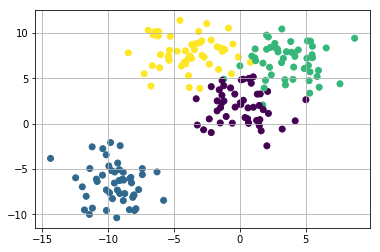

In [6]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])
plt.grid(True)

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans=KMeans(n_clusters=4)

In [9]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [20]:
kmeans.labels_

array([2, 1, 3, 1, 1, 0, 1, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 0, 2, 0, 3,
       3, 0, 2, 0, 0, 3, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 2, 2, 2,
       3, 1, 2, 3, 0, 3, 3, 2, 1, 3, 0, 2, 3, 3, 2, 1, 0, 1, 0, 2, 1, 3,
       0, 1, 1, 0, 1, 3, 0, 3, 0, 1, 1, 3, 2, 3, 3, 0, 1, 0, 3, 3, 3, 2,
       3, 0, 0, 0, 0, 3, 3, 0, 1, 2, 0, 1, 3, 0, 3, 3, 1, 3, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 3, 0, 2, 2, 2,
       3, 0, 0, 2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 2, 2, 2, 3, 1,
       3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 1, 1,
       0, 3], dtype=int32)

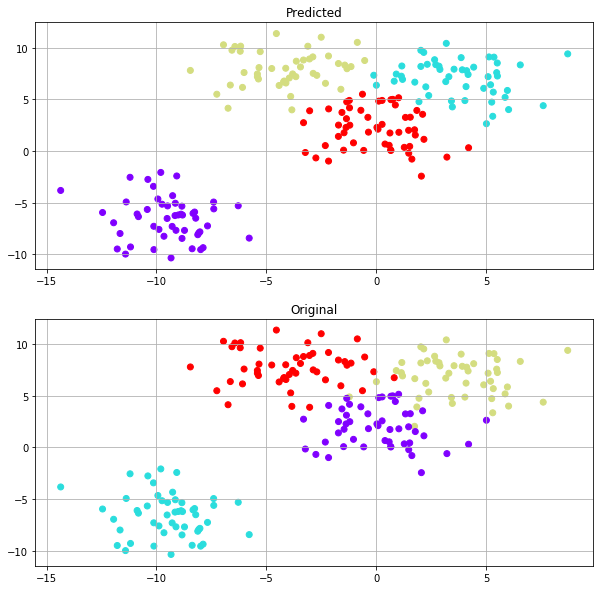

In [21]:
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(10,10))
ax1.scatter(data[0][0:,0],data[0][0:,1],c=kmeans.labels_,cmap='rainbow')
ax1.set_title('Predicted')
ax1.grid(True)
ax2.scatter(data[0][0:,0],data[0][0:,1],c=data[1],cmap='rainbow')
ax2.set_title('Original')
ax2.grid(True)

In [22]:
table=pd.DataFrame(data={'Original':data[1],'Predicted':kmeans.labels_})
table.head()

,Original,Predicted
0,3,2
1,2,1
2,0,3
3,2,1
4,2,1
